In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd /content/drive/My\ Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


['/content/drive/My Drive/Colab Notebooks/IMG_1.jpg']
count 16.7603


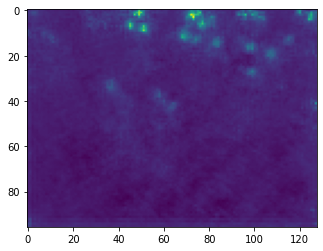

In [70]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
#from image import *
from model import CSRNet
import torch
get_ipython().run_line_magic('matplotlib', 'inline')


from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])



#where do you store your image waiting to estimate(need to be absoulte path)
root = '/content/drive/My Drive/Colab Notebooks'


path = os.path.abspath(root)

path_sets = [path]
img_paths = []
for img in path_sets:
    for img_path in (glob.glob(os.path.join(img, '*.jpg'))):
        img_paths.append(img_path)
print(img_paths)

model = CSRNet()
model = model.cuda()

checkpoint = torch.load('best55epochmodel_best.pth.tar')

model.load_state_dict(checkpoint['state_dict'])

mae = 0
for i in range(len(img_paths)):
    img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

    img[0,:,:]=img[0,:,:]-92.8207477031
    img[1,:,:]=img[1,:,:]-95.2757037428
    img[2,:,:]=img[2,:,:]-104.877445883
    img = img.cuda()
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    
    output = model(img.unsqueeze(0))

    output = output.detach().cpu().numpy()
    output = np.squeeze(output)
    output = np.squeeze(output)

    print('count',output.sum())
    plt.imshow(output)